# Questão 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import dataframe_image as dfi

In [2]:
chromecast = pd.read_csv('dataset_chromecast.csv', dtype={'device_id':np.int64, 'bytes_up':np.float64, 'bytes_down':np.float64}, parse_dates=['date_hour'])
smartv = pd.read_csv('dataset_smart-tv.csv', dtype={'device_id':np.int64, 'bytes_up':np.float64, 'bytes_down':np.float64}, parse_dates=['date_hour'])

In [92]:
chromecast['log_bytes_up'] = np.log10(chromecast['bytes_up'], where=chromecast['bytes_up']>0)
chromecast['log_bytes_down'] = np.log10(chromecast['bytes_down'], where=chromecast['bytes_down']>0)
chromecast['date_hour_txt'] = chromecast['date_hour'].dt.strftime('%Y-%m-%d %H:%M:%S')
smartv['log_bytes_up'] = np.log10(smartv['bytes_up'], where=smartv['bytes_up']>0)
smartv['log_bytes_down'] = np.log10(smartv['bytes_down'], where=smartv['bytes_down']>0)

In [93]:
chromecast

,device_id,date_hour,bytes_up,bytes_down,log_bytes_up,log_bytes_down,date_hour_txt
0,66161985,2021-09-06 00:01:00,2987.016393,49185.704918,3.475238,4.691839,2021-09-06 00:01:00
1,66161985,2021-09-06 00:02:00,685.935484,328.258065,2.836283,2.516215,2021-09-06 00:02:00
2,66161985,2021-09-06 00:03:00,4493.901639,37914.064516,3.652624,4.578800,2021-09-06 00:03:00
3,66161985,2021-09-06 00:04:00,776.133333,229.200000,2.889936,2.360215,2021-09-06 00:04:00
4,66161985,2021-09-06 00:05:00,3081.311475,51656.800000,3.488736,4.713127,2021-09-06 00:05:00
...,...,...,...,...,...,...,...
1620524,90339988,2021-11-26 16:52:00,2024.000000,43432.000000,3.306211,4.637810,2021-11-26 16:52:00
1620525,90339988,2021-11-26 16:53:00,7088.000000,1592.000000,3.850524,3.201943,2021-11-26 16:53:00
1620526,90339988,2021-11-26 16:54:00,488.000000,49632.000000,2.688420,4.695762,2021-11-26 16:54:00
1620527,90339988,2021-11-26 16:55:00,0.000000,136.000000,0.000000,2.133539,2021-11-26 16:55:00


In [5]:
smartv

,device_id,date_hour,bytes_up,bytes_down,log_bytes_up,log_bytes_down
0,77209603,2021-11-22 15:23:00,132932.983607,2.818140e+06,5.123633,6.449962
1,77209603,2021-11-22 15:24:00,115770.491803,2.264410e+06,5.063598,6.354955
2,77209603,2021-11-22 15:25:00,114030.032787,2.309270e+06,5.057019,6.363475
3,77209603,2021-11-22 15:26:00,97170.622951,2.006544e+06,4.987535,6.302449
4,77209603,2021-11-22 15:27:00,39569.573770,8.061440e+05,4.597361,5.906413
...,...,...,...,...,...,...
4417898,40241962,2021-11-25 23:19:00,8.000000,8.000000e+00,0.903090,0.903090
4417899,40241962,2021-11-25 23:21:00,8.000000,8.000000e+00,0.903090,0.903090
4417900,40241962,2021-11-25 23:23:00,8.000000,8.000000e+00,0.903090,0.903090
4417901,40241962,2021-11-25 23:25:00,8.000000,8.000000e+00,0.903090,0.903090


# Questão 2

In [6]:
chromecast_stats = pd.DataFrame(chromecast.iloc[:,4:].describe())
smartv_stats = pd.DataFrame(smartv.iloc[:,4:].describe())
chromecast_stats.loc['var'] = chromecast_stats.loc['std']**2
smartv_stats.loc['var'] = smartv_stats.loc['std']**2
stats = ['mean', 'var', 'std']
chromecast_stats = chromecast_stats.loc[stats]
smartv_stats = smartv_stats.loc[stats]

In [7]:
chromecast_stats, smartv_stats

(      log_bytes_up  log_bytes_down
 mean      3.349672        3.799335
 var       0.461600        1.665980
 std       0.679412        1.290728,
       log_bytes_up  log_bytes_down
 mean      2.156590        2.350173
 var       4.113083        6.723921
 std       2.028074        2.593052)

In [8]:
dfi.export(chromecast_stats, 'q2_general_stats_chromecast.png')
dfi.export(smartv_stats, 'q2_general_stats_smarsmartv.png')
chromecast_stats.to_csv('q2_general_stats_chromecast.csv')
smartv_stats.to_csv('q2_general_stats_smartv.csv')

C:\Users\arthu\AppData\Local\Temp\ipykernel_12452\2378490374.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


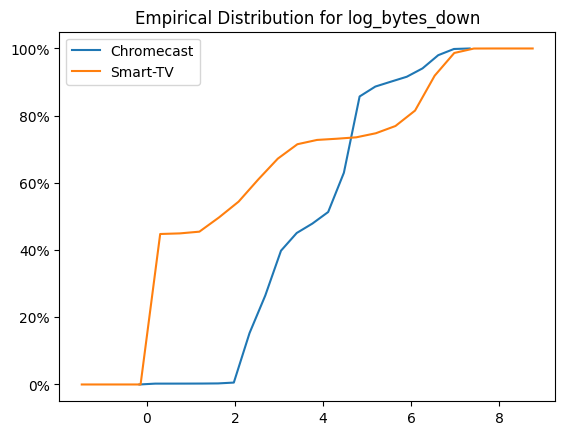

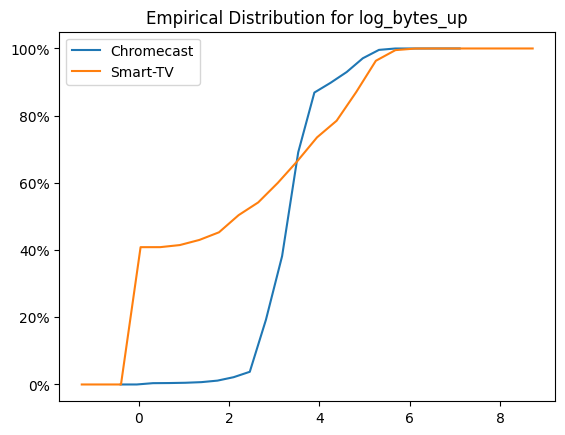

In [9]:
fields = ['log_bytes_down', 'log_bytes_up']
for f in fields:

    fig, ax = plt.subplots()
    nbins =  int(np.ceil(1 + 3.322*np.log10(chromecast[f].size))) # Sturges method
    count, bins_count = np.histogram(chromecast[f], bins=nbins)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    
    ax.plot(bins_count[1:], cdf, label=f"Chromecast")

    nbins =  int(np.ceil(1 + 3.322*np.log10(smartv[f].size))) # Sturges method
    count, bins_count = np.histogram(smartv[f], bins=nbins)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    ax.plot(bins_count[1:], cdf, label=f"Smart-TV")

    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
    plt.legend()
    plt.title(f"Empirical Distribution for {f}")
    plt.savefig(f"q2_empirical_dist_{f}.png")
    

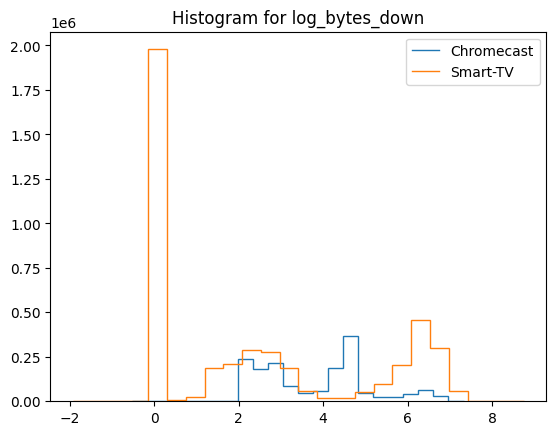

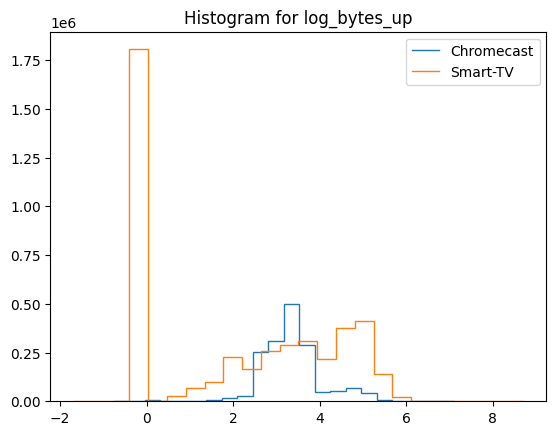

In [10]:
fields = ['log_bytes_down', 'log_bytes_up']
for f in fields:
    fig, ax = plt.subplots()

    nbins =  int(np.ceil(1 + 3.322*np.log10(chromecast[f].size))) # Sturges method
    count, bins_count = np.histogram(chromecast[f], bins=nbins)
    ax.stairs(count, bins_count, label=f"Chromecast")

    nbins =  int(np.ceil(1 + 3.322*np.log10(smartv[f].size))) # Sturges method
    count, bins_count = np.histogram(smartv[f], bins=nbins)
    ax.stairs(count, bins_count, label=f"Smart-TV")

    plt.legend()
    plt.title(f"Histogram for {f}")
    plt.savefig(f"q2_histogram_{f}.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


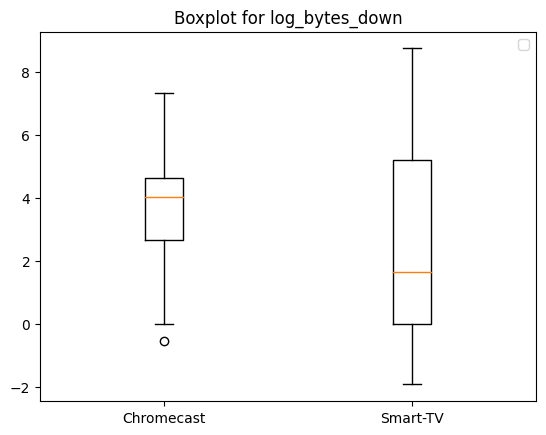

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


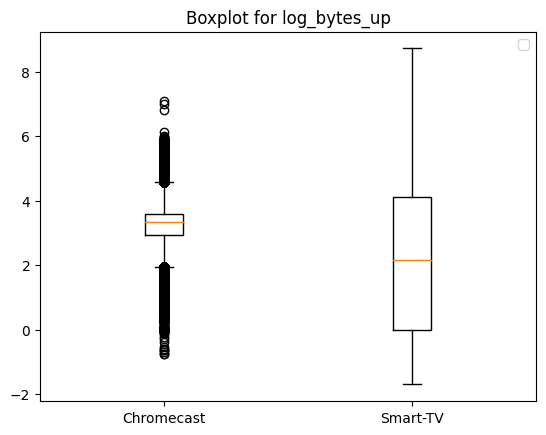

In [39]:
fields = ['log_bytes_down', 'log_bytes_up']
for f in fields:
    fig, ax = plt.subplots()
    ax.boxplot([chromecast[f],smartv[f]], labels=["Chromecast", "Smart-TV"])
    plt.legend()
    plt.title(f"Boxplot for {f}")
    plt.show()
    # plt.savefig(f"q2_boxplot_{f}.png")

# Questão 3

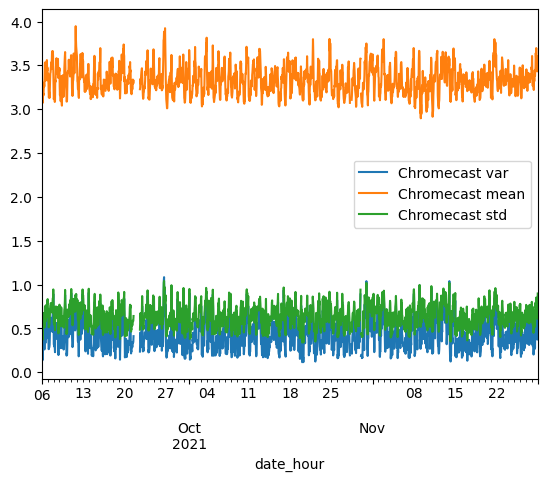

In [138]:
ax1 = chromecast.resample('H', on='date_hour').var().plot(y='log_bytes_up', label='Chromecast var')
ax2 = chromecast.resample('H', on='date_hour').mean().plot(y='log_bytes_up', label='Chromecast mean', ax=ax1)
ax3 = chromecast.resample('H', on='date_hour').std().plot(y='log_bytes_up', label='Chromecast std', ax=ax1)

In [145]:
a = chromecast.resample('H', on='date_hour').agg({'log_bytes_up':['var', 'mean', 'std']})
a.index

DatetimeIndex(['2021-09-06 00:00:00', '2021-09-06 01:00:00',
               '2021-09-06 02:00:00', '2021-09-06 03:00:00',
               '2021-09-06 04:00:00', '2021-09-06 05:00:00',
               '2021-09-06 06:00:00', '2021-09-06 07:00:00',
               '2021-09-06 08:00:00', '2021-09-06 09:00:00',
               ...
               '2021-11-28 14:00:00', '2021-11-28 15:00:00',
               '2021-11-28 16:00:00', '2021-11-28 17:00:00',
               '2021-11-28 18:00:00', '2021-11-28 19:00:00',
               '2021-11-28 20:00:00', '2021-11-28 21:00:00',
               '2021-11-28 22:00:00', '2021-11-28 23:00:00'],
              dtype='datetime64[ns]', name='date_hour', length=2016, freq='H')

<AxesSubplot:xlabel='date_hour'>

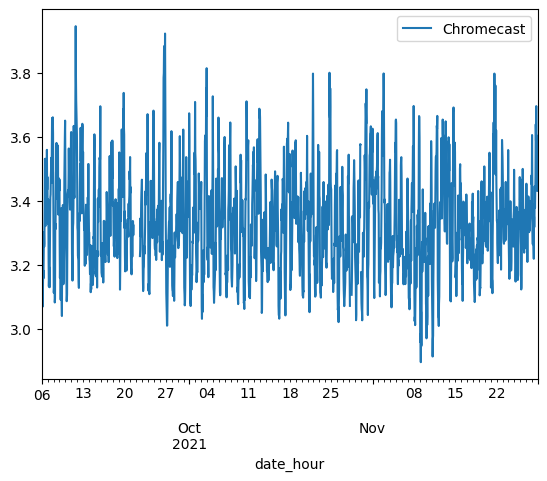

In [87]:
chromecast.resample('H', on='date_hour').mean().plot(y='log_bytes_up', label='Chromecast')

In [77]:
now = chromecast['date_hour'][0]
while True:
    if sum(chromecast['date_hour'] > now) > 0:
        now = now + pd.Timedelta(hours=1)
    else:
        break
    

KeyboardInterrupt: 

KeyboardInterrupt: 

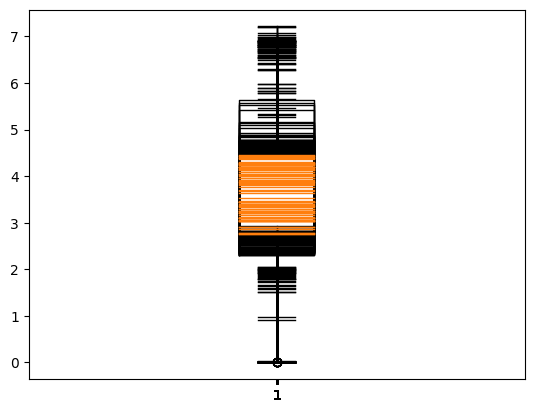

In [67]:
now = chromecast['date_hour'][0]
fig, ax = plt.subplots()
for f in fields:
    while True:
        if sum(chromecast['date_hour'] > now) > 0:
            data = chromecast[(chromecast['date_hour'].dt.date.to_numpy() == now.date()) & (chromecast['date_hour'].dt.hour.to_numpy() == now.hour)]
            ax.boxplot(data[f])
        else:
            break

        now = now + pd.Timedelta(hours=1)
    plt.legend()
    plt.title(f"Boxplot for {f}")
    plt.show()